在这里，我们将 NeuralProphet 拟合到分辨率为 5 分钟的数据（优胜美地的每日温度）。这是教程笔记本教程 4： 自动回归的延续。虽然教程 4 一般介绍了自回归，但本笔记本侧重于稀疏性

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level, set_random_seed, df_utils

# 导入依赖
import warnings
import numpy as np

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [3]:
data_location = "/home/ann/opt/iNeuralProphet/data"
df = pd.read_csv(data_location + "/yosemite_temps.csv")
df.head()

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8
3,2017-05-01 00:15:00,26.5
4,2017-05-01 00:20:00,25.6


# 1. 稀疏AR系数

NeuralProphet 的自回归组件被定义为 AR-Net（ 论文 ，github）。因此，如果我们想在 AR 系数中引起稀疏性，我们可以将 ar_reg 设置为一个大于零的数字。

但是，拟合具有多个组件和正则化的模型可能更难拟合，在某些情况下，您可能需要手动控制训练超参数。

In [4]:
m = NeuralProphet(
    n_lags=6 * 12,
    n_forecasts=3 * 12,
    n_changepoints=0,
    weekly_seasonality=False,
    daily_seasonality=False,
    learning_rate=0.01,
    ar_reg=0.1,
)
m.set_plotting_backend("plotly-static")
metrics = m.fit(df, freq="5min")  # validate_each_epoch=True, plot_live_loss=True

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

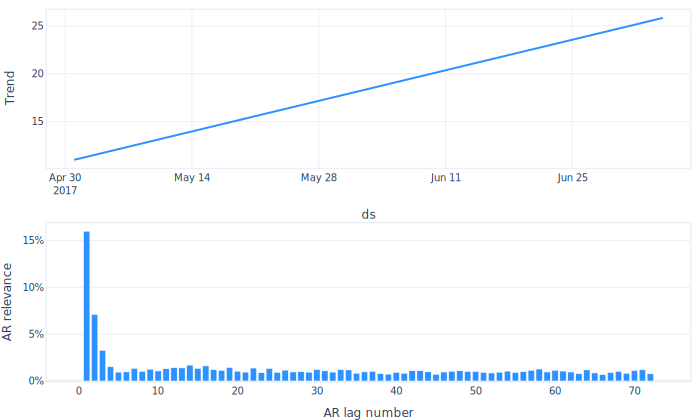

In [5]:
m.plot_parameters()

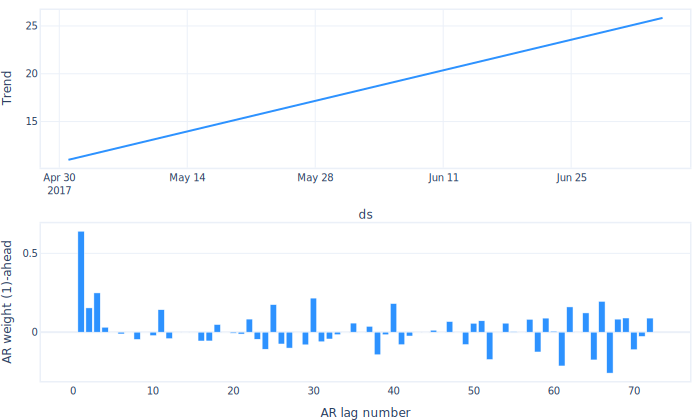

In [6]:
m = m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot_parameters()

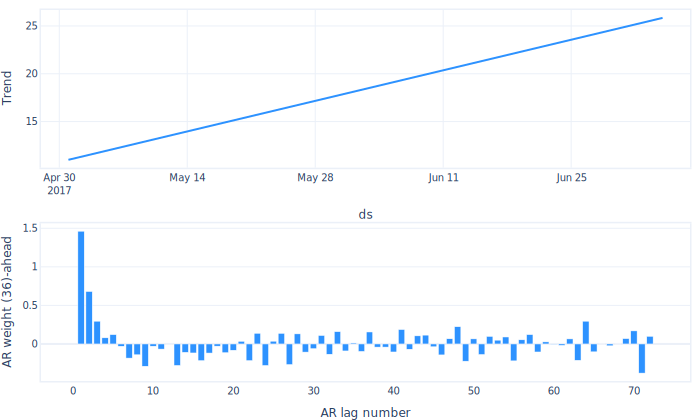

In [7]:
m = m.highlight_nth_step_ahead_of_each_forecast(36)
m.plot_parameters()

# 2. 进一步降低非零 AR 系数

通过将 ar_reg 设置得更高，我们可以进一步减少非零权重的数量。这里我们把它设置为 1

In [8]:
m = NeuralProphet(
    n_lags=6 * 12,
    n_forecasts=3 * 12,
    n_changepoints=0,
    daily_seasonality=False,
    weekly_seasonality=False,
    learning_rate=0.01,
    ar_reg=1,
)
m.set_plotting_backend("plotly-static")
metrics = m.fit(df, freq="5min")

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

In [ ]:
m.plot_parameters()

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot_parameters()

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(36)
m.plot_parameters()

# 3. 极度稀疏

我们设置的 ar_reg 越高，模型拟合的非零 weiths 就越少。在这里，我们将其设置为 10，这应该会导致单个非零滞后。

注意：极端值会导致训练不稳定。